In [ ]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from PIL import Image
import theano

In [ ]:
CATEGORIES = ["DEPRESSED","HEALTHY"]

In [ ]:
training = []
def createTrainingData(category):  
  class_num = CATEGORIES.index(category)
  if class_num==0:
    for i in range(101,146):
        try:
          filename=r"/content/drive/MyDrive/Depression_Current/AU_Plots_3/Depressed/AI_"+str(i)+".png"
          img_array = cv2.imread(filename)
          new_array = cv2.resize(img_array, (840,720))
          training.append([new_array, class_num])
        except:
          continue
  elif class_num==1:
    for i in range(301,345):
        try:
          filename=r"/content/drive/MyDrive/Depression_Current/AU_Plots_3/Healthy/AIC_"+str(i)+".png"
          img_array = cv2.imread(filename)
          new_array = cv2.resize(img_array, (840,720))
          training.append([new_array, class_num])
        except:
          continue
  else:
    print("Incorrect input")
createTrainingData("DEPRESSED")

In [ ]:
len(training)

41

In [ ]:
createTrainingData("HEALTHY")

In [ ]:
len(training)

85

In [ ]:
random.shuffle(training)
X =[]
y =[]
for features, label in training:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1,840,720,3)

X = X.astype('float32')
X /= 255
from keras.utils import np_utils
Y = np_utils.to_categorical(y, 2)
Y=np.array(Y)

print(Y)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [ ]:
#Exploratory Model
model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.leaky_relu,input_shape=(840,720,3)),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.leaky_relu),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(32, activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(2,  activation=tf.nn.sigmoid)
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size =5, epochs =15, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/15
14/14 [==============================] - 24s 852ms/step - loss: 23.9030 - accuracy: 0.5441 - val_loss: 2.1125 - val_accuracy: 0.7059
Epoch 2/15
14/14 [==============================] - 9s 680ms/step - loss: 5.1727 - accuracy: 0.4559 - val_loss: 4.8620 - val_accuracy: 0.2941
Epoch 3/15
14/14 [==============================] - 9s 676ms/step - loss: 3.9302 - accuracy: 0.4412 - val_loss: 1.6107 - val_accuracy: 0.7059
Epoch 4/15
14/14 [==============================] - 9s 676ms/step - loss: 1.2575 - accuracy: 0.6912 - val_loss: 2.7960 - val_accuracy: 0.2941
Epoch 5/15
14/14 [==============================] - 10s 685ms/step - loss: 2.4575 - accuracy: 0.6324 - val_loss: 0.7952 - val_accuracy: 0.7059
Epoch 6/15
14/14 [==============================] - 9s 676ms/step - loss: 1.8797 - accuracy: 0.5882 - val_loss: 0.7681 - val_accuracy: 0.5882
Epoch 7/15
14/14 [==============================] - 9s 675ms/step - loss: 0.5794 - accuracy: 0.8824 - val_loss: 0.5579 - val_accuracy: 0.8235
Epo

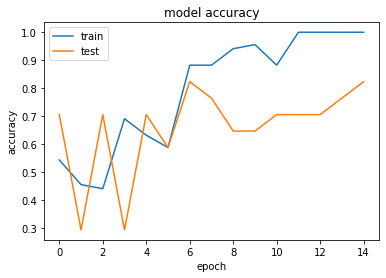

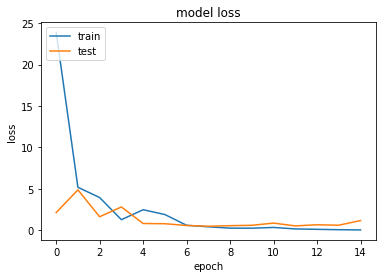

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
a=cv2.imread(r"/content/drive/MyDrive/Depression_Current/AU_Plots_3/Healthy/AIC_305.png")

In [ ]:
a=cv2.resize(a,(840,720))

In [ ]:
a=a.reshape(-1,840,720,3)
a=a/255.0

In [ ]:
model(a)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2.5081992e-04, 9.9998510e-01]], dtype=float32)>

In [ ]:
model.save((r"/content/drive/MyDrive/Depression/Depression_Detection/Sniffer_models/Basic_Relevant_AU_Model_balanced_big_best_final"))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Depression/Depression_Detection/Sniffer_models/Basic_Relevant_AU_Model_balanced_big_best_final/assets


In [ ]:
import tensorflow as tf
model=tf.keras.models.load_model(r"/content/drive/MyDrive/Depression/Depression_Detection/Slicing_Experiment/70_sec_and_10_overlap/CNN80Model")

In [ ]:
import cv2
import os
x=os.listdir(r"/content/drive/MyDrive/Depression/Depression_Detection/Slicing_Experiment/70_sec_and_10_overlap/Spectrograms_Depressed")
route=r"/content/drive/MyDrive/Depression/Depression_Detection/Slicing_Experiment/70_sec_and_10_overlap/Spectrograms_Depressed/"
for item in x:
  img=cv2.imread(route+item)
  img=cv2.resize(img,(430,280))
  img=img.reshape(-1,430,280,3)
  img=img/255.0
  out=model(img)
  ans=0
  p=out.numpy()
  w=list(p[0])
  if w[1]>w[0]:
    ans=1
  if ans==1:
    print("Healthy")
  else:
    print("Depressed")

Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Healthy
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Healthy
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Healthy
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Depressed
Healthy
Depressed
Depressed
Depresse

KeyboardInterrupt: ignored

In [ ]:
x

['Mel_AI_122_result_slice_490000.png',
 'Mel_AI_122_result_slice_560000.png',
 'Mel_AI_122_result_slice_630000.png',
 'Mel_AI_122_result_slice_700000.png',
 'Mel_AI_122_result_slice_770000.png',
 'Mel_AI_122_result_slice_840000.png',
 'Mel_AI_122_result_slice_910000.png',
 'Mel_AI_122_result_slice_980000.png',
 'Mel_AI_122_result_slice_1050000.png',
 'Mel_AI_122_result_slice_1120000.png',
 'Mel_AI_122_result_slice_1190000.png',
 'Mel_AI_122_result_slice_1260000.png',
 'Mel_AI_122_result_slice_1330000.png',
 'Mel_AI_123_result_slice_0.png',
 'Mel_AI_123_result_slice_70000.png',
 'Mel_AI_123_result_slice_140000.png',
 'Mel_AI_123_result_slice_210000.png',
 'Mel_AI_123_result_slice_280000.png',
 'Mel_AI_123_result_slice_350000.png',
 'Mel_AI_123_result_slice_420000.png',
 'Mel_AI_123_result_slice_490000.png',
 'Mel_AI_123_result_slice_560000.png',
 'Mel_AI_123_result_slice_630000.png',
 'Mel_AI_123_result_slice_700000.png',
 'Mel_AI_124_result_slice_0.png',
 'Mel_AI_124_result_slice_70000

In [ ]:
p=a.numpy()

In [ ]:
a=[1,2,3]
a.index(2)

1

In [ ]:
w=list(p[0])

In [ ]:
w

[0.00018391013, 0.99967587]